In [21]:
import pandas as pd
import numpy as np
import math
import quandl as qd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsRegressor
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
df = qd.get("NSE/POWERGRID", authtoken="gmWv5h5b4KEUxUbiSneX")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2007-10-05 to 2018-12-18
Data columns (total 7 columns):
Open                    2774 non-null float64
High                    2774 non-null float64
Low                     2774 non-null float64
Last                    2774 non-null float64
Close                   2774 non-null float64
Total Trade Quantity    2774 non-null float64
Turnover (Lacs)         2774 non-null float64
dtypes: float64(7)
memory usage: 173.4 KB


In [24]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2007-10-05 to 2018-12-18
Data columns (total 7 columns):
Open                    2774 non-null float64
High                    2774 non-null float64
Low                     2774 non-null float64
Last                    2774 non-null float64
Close                   2774 non-null float64
Total Trade Quantity    2774 non-null float64
Turnover (Lacs)         2774 non-null float64
dtypes: float64(7)
memory usage: 173.4 KB


In [26]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2.774000e+03,2774.000000
mean,131.442466,133.120043,129.539870,131.318241,131.323468,5.168941e+06,6898.024023
std,38.659946,38.808649,38.451954,38.584029,38.595646,1.289488e+07,14966.625018
min,61.700000,62.000000,52.000000,59.150000,58.000000,3.406300e+04,38.250000
25%,102.100000,103.700000,100.712500,102.300000,102.162500,2.125444e+06,2360.895000
50%,113.625000,115.050000,111.925000,113.400000,113.375000,3.392113e+06,4217.990000
75%,149.000000,150.987500,146.775000,148.850000,148.662500,5.547522e+06,7771.160000
max,226.500000,226.600000,223.000000,225.500000,225.950000,4.810589e+08,493056.070000


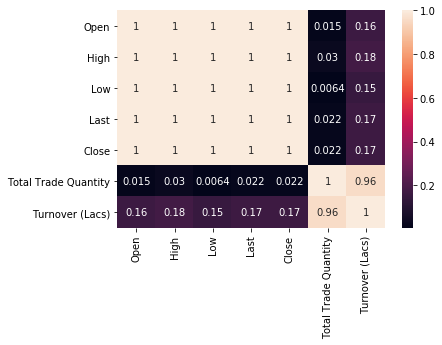

In [27]:
plt.figure(1)
sns.heatmap(df.corr(), annot=True)
plt.show()

/home/navjot/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


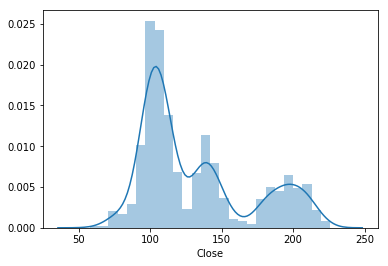

In [28]:
plt.figure(2)
sns.distplot(df.Close)
plt.show()

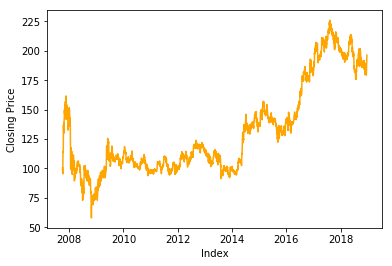

In [29]:
plt.figure(3)
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.plot(df.Close, color='orange')
plt.show()

In [30]:
df_temp = df[['Open', 'High', 'Low', 'Close', 'Total Trade Quantity']]
df_temp['HLP'] = (df_temp['High'] - df_temp['Close']) / df_temp['Close'] * 100.0
df_temp['Change'] = (df_temp['Close'] - df_temp['Open']) / df_temp['Open'] * 100
df_temp['EPS'] = (df['Turnover (Lacs)']*100000)/df['Total Trade Quantity']
df_temp['PE'] = df_temp['Close']/df_temp['EPS']

df_use = df_temp[['Close', 'HLP', 'Change', 'Total Trade Quantity', 'EPS', 'PE']]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_use.head()

,Close,HLP,Change,Total Trade Quantity,EPS,PE
Date,,,,,,
2007-10-05,100.60,8.846918,12.026726,481058927.0,102.493903,0.981522
2007-10-08,95.45,8.957569,-8.221154,71252858.0,98.124008,0.972749
2007-10-09,101.95,0.882786,6.753927,65658228.0,98.567753,1.034314
2007-10-10,102.90,2.040816,-1.625239,38211410.0,103.657180,0.992695
2007-10-11,114.40,4.895105,-4.666667,59805552.0,110.779598,1.032681


In [32]:
forecast_col = 'Close'

forecast_out = int(math.ceil(0.01*len(df_use)))

df_use['Label'] = df_use[forecast_col].shift(-forecast_out)

df_use.dropna(inplace=True)

df_use.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Close,HLP,Change,Total Trade Quantity,EPS,PE,Label
Date,,,,,,,
2018-10-31,185.95,0.430223,0.459211,5412453.0,184.345989,1.008701,182.55
2018-11-01,188.45,0.451048,1.262762,3151762.0,186.726028,1.009233,182.55
2018-11-02,189.85,1.290492,0.423168,3394386.0,190.506619,0.996553,185.70
2018-11-05,186.05,1.854340,-1.586882,2740960.0,185.965501,1.000454,192.55
2018-11-06,188.10,0.478469,0.534474,4127100.0,187.264908,1.004459,196.35


In [33]:
print('We are predicting "', forecast_out, '" days into the future')

We are predicting " 28 " days into the future


In [34]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2746 entries, 2007-10-05 to 2018-11-06
Data columns (total 7 columns):
Close                   2746 non-null float64
HLP                     2746 non-null float64
Change                  2746 non-null float64
Total Trade Quantity    2746 non-null float64
EPS                     2746 non-null float64
PE                      2746 non-null float64
Label                   2746 non-null float64
dtypes: float64(7)
memory usage: 171.6 KB


In [35]:
X = df_use
X = X.drop(['Label'], 1)
# X = preprocessing.scale(X)

y = df_use['Label']

print(X.shape, y.shape)

(2746, 6) (2746,)


In [36]:
# X = np.array(df_use.drop(['label'], 1))
# y = np.array(df_use['label'])

# X = preprocessing.scale(X)

# print(X.shape, Y.shape)

In [37]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2196, 6) (2196,)
(550, 6) (550,)


### KNN

In [38]:
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, 
                                            weights='uniform', 
                                            algorithm='auto', 
                                            leaf_size=30, p=2, 
                                            metric='minkowski')
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)

-0.13178638530412567


### Decision Tree

In [39]:
clf_DTR = sklearn.tree.DecisionTreeRegressor()
clf_DTR.fit(X_train, y_train)

accuracy_DTR = clf_DTR.score(X_test, y_test)

print(accuracy_DTR)

0.8866583059391039


### Random Forest

In [40]:
clf_RFR = sklearn.ensemble.RandomForestRegressor()
clf_RFR.fit(X_train, y_train)

accuracy_RFR = clf_RFR.score(X_test, y_test)

print(accuracy_RFR)

0.9335719150521106
